In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [5]:
# Read CSV file
sales_df = pd.read_excel('C:\Jenny Pham\Advanced JRM\My Projects\Python\Sales\superstore_sales.xlsx')

In [6]:
# Group by product_name and aggregate sales
product_name_sales = sales_df.groupby(['product_name'])[['sales']].sum().reset_index()

# Sort by sales in descending order and keep the top 5
product_name_sales.sort_values(by= ['sales'], ascending = False, inplace = True)
product_name_sales = product_name_sales.head(5)

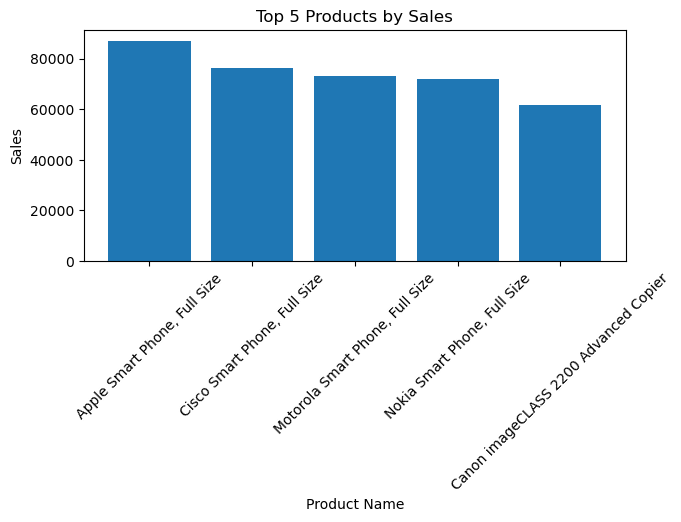

In [7]:
# Create a bar chart
plt.figure(figsize = (7,3))
plt.bar(product_name_sales['product_name'], product_name_sales['sales'])

# Add labels and title
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.title('Top 5 Products by Sales')
plt.xticks(rotation = 45)

# Show the plot
plt.show()


In [8]:
# Group by segment and aggregate profit
product_name_profit = sales_df.groupby(['segment'])[['profit']].sum().reset_index()

# Sort by profit in descending order and keep the top 5
product_name_profit.sort_values(by=['profit'], ascending = False, inplace = True)
product_name_profit = product_name_profit.head(5)

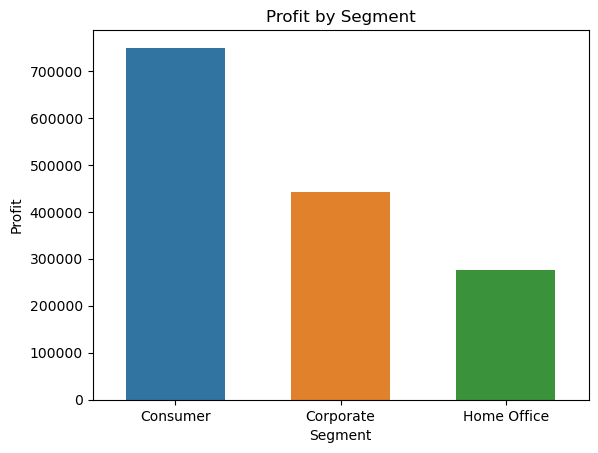

In [9]:
# Create a bar plot
sns.barplot(x = 'segment', y = 'profit', data = product_name_profit, width = 0.6)

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit by Segment')

# Show the plot
plt.show()

In [10]:
# Group by category and sub_category, then sum
pd.DataFrame(sales_df.groupby(['category', 'sub_category']).sum(numeric_only = True)['quantity'])

quantity
category        sub_category          
Furniture       Bookcases         8310
                Chairs           12336
                Furnishings      11225
                Tables            3083
Office Supplies Appliances        6078
                Art              16301
                Binders          21429
                Envelopes         8380
                Fasteners         8390
                Labels            9322
                Paper            12822
                Storage          16917
                Supplies          8543
Technology      Accessories      10946
                Copiers           7454
                Machines          4906
                Phones           11870

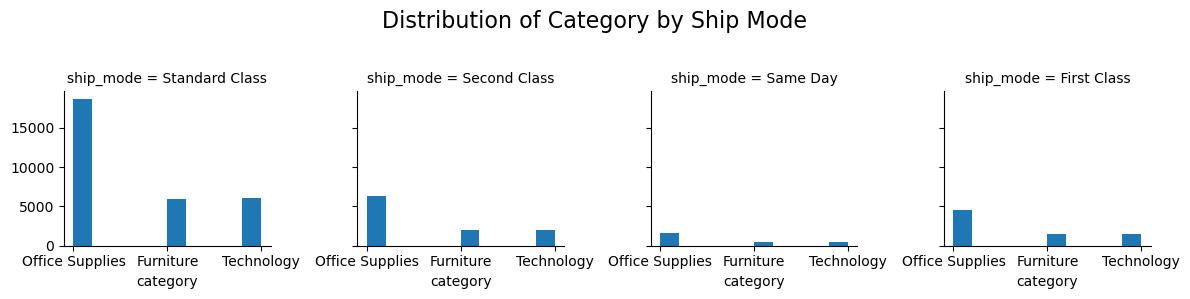

In [11]:
# Create a FacetGrid
category_name = sns.FacetGrid(sales_df, col = 'ship_mode')

# Map a histogram to visualize the distribution of 'category'
category_name.map(plt.hist, 'category')

# Add a title for the entire FacetGrid
plt.suptitle('Distribution of Category by Ship Mode', fontsize = 16)

# Adjust the layout to prevent overlap with the title
plt.subplots_adjust(top = 0.9)

# Use tight_layout() for automatic adjustment
plt.tight_layout(rect = [0, 0, 1, 0.95])  # Adjust layout to avoid title overlap

# Show the plot
plt.show()


In [12]:
# Convert 'order_date' to string and then to datetime format
month = sales_df['order_date'].astype(str)
month = month.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Extract the month from the datetime object
sales_df['month'] = month.map(lambda x: x.month)


In [13]:
# Group by 'year' and 'month' and sum the numeric columns
date = sales_df.groupby(['year', 'month']).sum(numeric_only = True)

# Reset index to make 'year' and 'month' columns again
date_reset = date.reset_index()


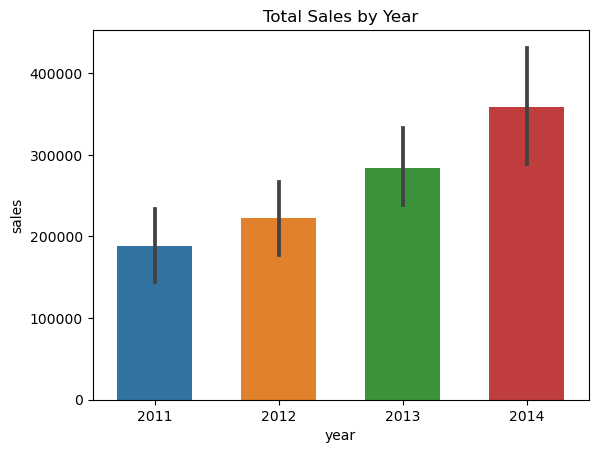

In [14]:
# Create a bar plot for sales by year
sns.barplot(x = 'year', y = 'sales', data = date_reset, width = 0.6)

# Add a title to the plot
plt.title('Total Sales by Year')

# Show the plot
plt.show()

In [15]:
# Group by 'country' and sum the sales
countries = pd.DataFrame(sales_df.groupby('country').sum(numeric_only=True)['sales'])

In [16]:
# Create a choropleth map to visualize sales by country
fig = px.choropleth(countries,
                    locations = countries.index,  # Country names
                    locationmode = 'country names',  # Use country names for the map
                    color = 'sales',  # The column to color by
                    color_continuous_scale = 'Viridis',  # Color scale
                    labels = {'sales': 'Total Sales'},
                    title = "Sales by Country")

# Center the title
fig.update_layout(title_x = 0.5)  # 0.5 will center the title

# Show the map
fig.show()

In [17]:
# Sort countries by sales and get the top 10
countries.sort_values('sales', inplace = True, ascending = False)
top_10 = countries.head(10)

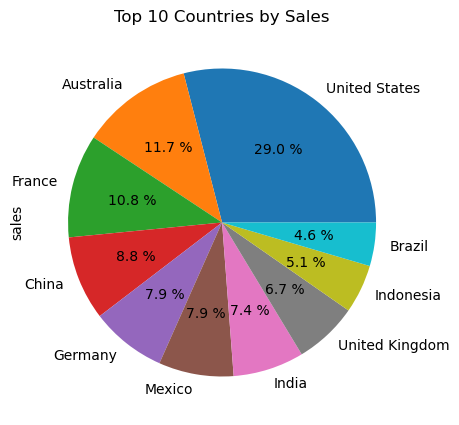

In [18]:
# Plot a pie chart for the top 10 countries by sales
plt.figure(figsize = (10, 5))
top_10['sales'].plot(kind = 'pie', autopct = '%1.1f %%', labels = top_10.index, legend = False)

# Set the title
plt.title('Top 10 Countries by Sales')

# Show the plot
plt.show()

In [19]:
# Group by 'country' and calculate the maximum 'shipping_cost'
top_10_shipping = sales_df.groupby(['country']).agg({'shipping_cost': 'max'}).sort_values('shipping_cost', ascending = False).head(10)


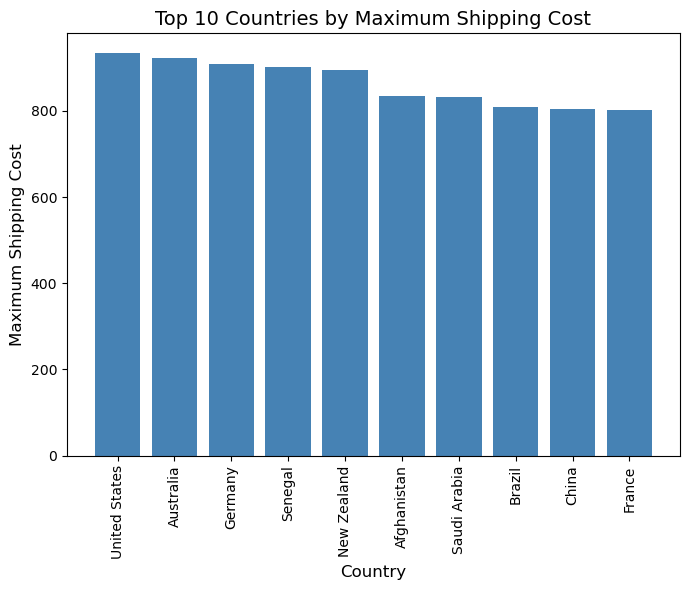

In [20]:
# Create a bar chart
plt.figure(figsize = (7,6)) 
plt.bar(top_10_shipping.index, top_10_shipping['shipping_cost'], color = '#4682B4')

# Rotate x-axis labels for better readability and adjust the font size
plt.xticks(rotation = 90, size = 10) 

# Adding title and axis labels
plt.title('Top 10 Countries by Maximum Shipping Cost', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Maximum Shipping Cost', fontsize = 12)

# Tight layout to ensure no overlap
plt.tight_layout()

# Show the plot
plt.show()